In [1]:
from __future__ import print_function
from fenics import *
from mshr import *
import matplotlib.pyplot as plt

In [2]:

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)

V = FunctionSpace(mesh, 'P', 1)
u = TrialFunction(V)
v = TestFunction(V)

#define kappa
kappa = Expression('x[0]*x[1]', degree=2)

#define right hand side func
f = Constant(-6.0)

# Define Dirichlet boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

# Define Neumann boundary condition
g = Expression('23 + x[0]', degree=1)


#defining markers for diff parts of. boundurt
boundary_markers = MeshFunction('size_t',mesh,  mesh.topology().dim()-1, 0)

In [3]:
tol = 1e-10

class BoundaryX0(SubDomain):
        def inside(self, x, on_boundary):
            return on_boundary and near(x[0], 0, tol)

class BoundaryX1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], 1, tol)

class BoundaryY0(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], 0, tol)

class BoundaryY1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], 1, tol)

# Mark boundaries

bx0 = BoundaryX0()
bx1 = BoundaryX1()
by0 = BoundaryY0()
by1 = BoundaryY1()
bx0.mark(boundary_markers, 0)
bx1.mark(boundary_markers, 1)
by0.mark(boundary_markers, 2)
by1.mark(boundary_markers, 3)


In [4]:
boundary_conditions = {0: {'Dirichlet': u_D},
                      1: {'Dirichlet': 0},
                      2: {'Neumann' : g},
                      3: {'Neumann' : 0}}

In [5]:
# Collect Dirichlet conditions
bcs = []
for i in boundary_conditions:
    if 'Dirichlet' in boundary_conditions[i]:
        bc = DirichletBC(V, boundary_conditions[i]['Dirichlet'],
                         boundary_markers, i)
        bcs.append(bc)


In [6]:
# to express ints over the boundary parts we must redifine the mesuare ds in terms of boundary markers

ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)
# dx = Measure('dx', domain=mesh, subdomain_data=boundary_markers)


In [7]:
#Collect Neumann integrals
integrals_N = []
for i in boundary_conditions:
    if 'Neumann' in boundary_conditions[i]:
        if boundary_conditions[i]['Neumann'] != 0:
            g = boundary_conditions[i]['Neumann']
            integrals_N.append(g*v*ds(i))


In [8]:
F = kappa*dot(grad(u), grad(v))*dx + f*v*dx +sum(integrals_N)
a, L = lhs(F), rhs(F)

# a = kappa*dot(grad(u), grad(v))*dx 
# L = f*v*dx - sum(integrals_N) 

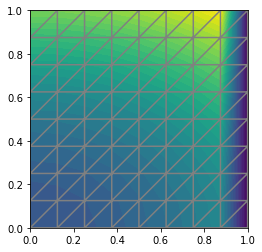

In [9]:
# Compute solution



u = Function(V)
solve(a == L, u, bcs)

# Plot solution and mesh
plot(u)
plot(mesh)


# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
# vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
# import numpy as np
# error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# # Print errors
# print('error_L2  =', error_L2)
# print('error_max =', error_max)

# Hold plot
plt.show()

In [10]:

vertex_values_u 

array([1.      , 1.015625, 1.0625  , 1.140625, 1.25    , 1.390625,
       1.5625  , 1.765625, 0.      , 1.03125 , 1.046875, 1.09375 ,
       1.171875, 1.28125 , 1.421875, 1.59375 , 1.796875, 0.      ,
       1.125   , 1.140625, 1.1875  , 1.265625, 1.375   , 1.515625,
       1.6875  , 1.890625, 0.      , 1.28125 , 1.296875, 1.34375 ,
       1.421875, 1.53125 , 1.671875, 1.84375 , 2.046875, 0.      ,
       1.5     , 1.515625, 1.5625  , 1.640625, 1.75    , 1.890625,
       2.0625  , 2.265625, 0.      , 1.78125 , 1.796875, 1.84375 ,
       1.921875, 2.03125 , 2.171875, 2.34375 , 2.546875, 0.      ,
       2.125   , 2.140625, 2.1875  , 2.265625, 2.375   , 2.515625,
       2.6875  , 2.890625, 0.      , 2.53125 , 2.546875, 2.59375 ,
       2.671875, 2.78125 , 2.921875, 3.09375 , 3.296875, 0.      ,
       3.      , 3.015625, 3.0625  , 3.140625, 3.25    , 3.390625,
       3.5625  , 3.765625, 0.      ])

In [11]:
vertex_values_kappa = kappa.compute_vertex_values(mesh)
vertex_values_kappa

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.015625, 0.03125 ,
       0.046875, 0.0625  , 0.078125, 0.09375 , 0.109375, 0.125   ,
       0.      , 0.03125 , 0.0625  , 0.09375 , 0.125   , 0.15625 ,
       0.1875  , 0.21875 , 0.25    , 0.      , 0.046875, 0.09375 ,
       0.140625, 0.1875  , 0.234375, 0.28125 , 0.328125, 0.375   ,
       0.      , 0.0625  , 0.125   , 0.1875  , 0.25    , 0.3125  ,
       0.375   , 0.4375  , 0.5     , 0.      , 0.078125, 0.15625 ,
       0.234375, 0.3125  , 0.390625, 0.46875 , 0.546875, 0.625   ,
       0.      , 0.09375 , 0.1875  , 0.28125 , 0.375   , 0.46875 ,
       0.5625  , 0.65625 , 0.75    , 0.      , 0.109375, 0.21875 ,
       0.328125, 0.4375  , 0.546875, 0.65625 , 0.765625, 0.875   ,
       0.      , 0.125   , 0.25    , 0.375   , 0.5     , 0.625   ,
       0.75    , 0.875   , 1.      ])